**Descripción general**
El proyecto consiste en aplicar los conocimientos aprendidos en clase (y apoyándose de referencias adicionales útiles) para crear modelos predictivos de regresión lineal uni-variable sencillos de la forma:

y = f(x) =  mx +b

Donde:

y = la variable dependiente
x = variable independiente
m = pendiente de la recta(parámetro del modelo)
b = intercepto(parámetro del modelo)

Tanto “x” como “y” son parte del dataset usado , “m” y “b” son parámetros del modelo los cuales buscamos estimar con los datos, esto significa que se busca encontrar que valores de “m” y “b” producen una recta que describa de la mejor manera posible la relación entre los datos “x” y “y”.


*Importar todas las libreria que utilizaremos en el Proyecto:*

In [59]:
import numpy as np
import sklearn as scikit_learn
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from matplotlib import style

In [60]:
data = np.load('C:\R_File\Master of Data Science\Python\Project\proyecto_data\proyecto_training_data.npy') 

In [164]:
x = data
training_idx = np.random.randint(x.shape[0], size=80)
test_idx = np.random.randint(x.shape[0], size=20)
training, test = x[training_idx,:], x[test_idx,:]

In [165]:

casadf = pd.DataFrame(training)
casadf.rename(columns={   0 :'precio',
                          1:'Calif',
                          2:'fsqrt',
                          3 :'trooms',
                          4: 'yearbuilt',
                          5 : 'LotFrontage'}, 
                 inplace=True)
casadf['precio']= casadf['precio']/1000
casadf.fillna(0,inplace=True)

In [166]:
casadf.describe(include='all')

,precio,Calif,fsqrt,trooms,yearbuilt,LotFrontage
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,170.756937,5.975000,1118.637500,6.325000,1970.150000,53.937500
std,63.480939,1.242446,356.036381,1.421133,31.173707,32.073627
min,52.000000,3.000000,483.000000,4.000000,1885.000000,0.000000
25%,128.875000,5.000000,875.750000,5.000000,1953.750000,34.000000
50%,159.000000,6.000000,1093.500000,6.000000,1968.000000,60.000000
75%,197.475000,7.000000,1308.500000,7.000000,2001.250000,75.000000
max,395.000000,9.000000,2515.000000,12.000000,2009.000000,111.000000


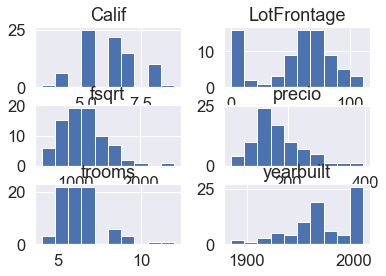

In [185]:
casadf.drop(['precio'],1).hist()
plt.show()

In [197]:

trainingpd.corr(method='pearson', min_periods=1)


,precio,Calif,fsqrt,trooms,yearbuilt,LotFrontage
precio,1.000000,0.812014,0.577332,0.385732,0.587860,0.322014
Calif,0.812014,1.000000,0.352151,0.347460,0.548745,0.349764
fsqrt,0.577332,0.352151,1.000000,0.368151,0.182067,0.290318
trooms,0.385732,0.347460,0.368151,1.000000,-0.124692,0.396262
yearbuilt,0.587860,0.548745,0.182067,-0.124692,1.000000,0.073905
LotFrontage,0.322014,0.349764,0.290318,0.396262,0.073905,1.000000


(80, 1)
(80,)


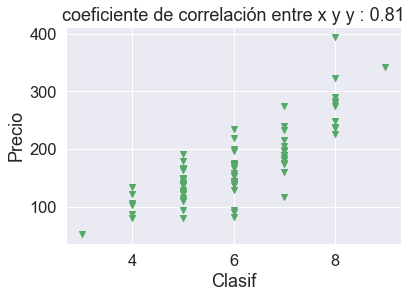

In [215]:


X = casadf.drop(["precio","fsqrt","yearbuilt","LotFrontage","trooms"], axis=1).values
Y = casadf["precio"].values

print(X.shape)
print(Y.shape)
fig = plt.figure()
ax = fig.add_subplot(1,1,1) #creamos un canvas con  1 fila, 1 columna y devolvemos una referencia a la primera grafica
#ax = fig.add_subplot(111) 

ax.scatter(X, Y,marker="v",color="g")  # experimentar con los siguientes markers o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'#
#ax.scatter(x, y,color="g")  # experimentar con los siguientes markers o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'

ax.set_xlabel('Clasif')
ax.set_ylabel('Precio')
ax.set_title('coeficiente de correlación entre x y y : 0.81')

plt.show()

In [181]:
test.data.shape
testpd = pd.DataFrame(test)
testpd.fillna(0 ,inplace=True)
print(testpd.head())

          0    1       2    3       4     5
0  176500.0  7.0   955.0  8.0  1998.0  63.0
1  176485.0  7.0  1302.0  6.0  2007.0  73.0
2  202500.0  8.0  1370.0  6.0  2006.0  44.0
3  119000.0  5.0   961.0  7.0  1900.0  50.0
4   60000.0  2.0   800.0  4.0  1936.0  51.0


,precio,Calif,fsqrt,trooms,yearbuilt,LotFrontage
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,169.022125,5.812500,1186.787500,6.437500,1968.387500,59.937500
std,67.392447,1.181007,385.530859,1.621405,29.900042,28.807235
min,40.000000,3.000000,612.000000,3.000000,1910.000000,0.000000
25%,124.500000,5.000000,898.000000,5.000000,1952.250000,50.000000
50%,163.700000,6.000000,1050.000000,6.000000,1969.500000,62.500000
75%,188.525000,7.000000,1531.250000,7.000000,1996.250000,79.250000
max,423.000000,9.000000,2196.000000,12.000000,2010.000000,124.000000


In [65]:
trainingpd.rename(columns={   0 :'precio',
                          1:'Calif',
                          2:'fsqrt',
                          3 :'trooms',
                          4: 'yearbuilt',
                          5 : 'LotFrontage'}, 
                 inplace=True)
trainingpd['precio']= trainingpd['precio']/1000

trainingpd.describe(include='all')

,precio,Calif,fsqrt,trooms,yearbuilt,LotFrontage
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.169022,5.812500,1186.787500,6.437500,1968.387500,59.937500
std,0.067392,1.181007,385.530859,1.621405,29.900042,28.807235
min,0.040000,3.000000,612.000000,3.000000,1910.000000,0.000000
25%,0.124500,5.000000,898.000000,5.000000,1952.250000,50.000000
50%,0.163700,6.000000,1050.000000,6.000000,1969.500000,62.500000
75%,0.188525,7.000000,1531.250000,7.000000,1996.250000,79.250000
max,0.423000,9.000000,2196.000000,12.000000,2010.000000,124.000000


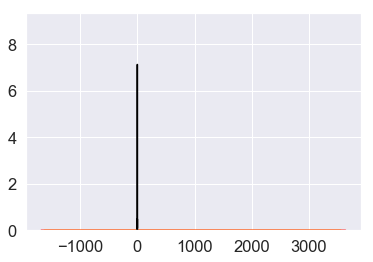

In [143]:
sb.distplot(X[0], color="gold");
sb.distplot(X[1], color="red");
sb.distplot(Y, color="black");





In [140]:
np.corrcoef(trainingpd.values.T)

array([[ 1.        ,  0.81201444,  0.57733177,  0.385732  ,  0.58785993,
         0.32201434],
       [ 0.81201444,  1.        ,  0.35215064,  0.34745988,  0.5487449 ,
         0.34976427],
       [ 0.57733177,  0.35215064,  1.        ,  0.3681514 ,  0.18206676,
         0.29031764],
       [ 0.385732  ,  0.34745988,  0.3681514 ,  1.        , -0.12469232,
         0.39626231],
       [ 0.58785993,  0.5487449 ,  0.18206676, -0.12469232,  1.        ,
         0.07390533],
       [ 0.32201434,  0.34976427,  0.29031764,  0.39626231,  0.07390533,
         1.        ]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(X_train)
print(X_test)